                            PROYECTO INDIVIDUAL: EDA MACHINE LEARNING SISTEMA DE RECOMDACION 

LIBRERIAS:

In [96]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 
from sklearn import preprocessing
import json

In [5]:
mov1 = pd.read_csv('final_movie.csv')


In [6]:
mov1.head(0)

,id,title,tagline,overview,runtime,original_language,Genre,Franquicia,status,release_date,release_year,popularity,vote_average,Company,Country,Spoken_Language,revenue,budget,return,Director


In [ ]:
Le cambio el título a las columnas para ordenar visualmete un poco mas el dataframe

In [7]:
# Cambiar el nombre de las columnas
nuevos_nombres ={'id':'ID','title':' Title','tagline':' Tagline', 'overview':'Overview', 'runtime': 'Runtime', 'original_language':'Original_Language', 'genre':'Genre',
                  'Franquicia':'Franquicia','status':'Status','release_date':'Release_Date','release_year':'Release_Year','popularity':'Popularity','vote_average':'Vote_Average',
                  'Company':'Company','Country':'Country','Spoken_Language':'Spoken_Language', 'revenue':'Revenue','budget':'Budget','return':'Return'}



In [8]:
mov1 = mov1.rename(columns=nuevos_nombres)

In [9]:
mov1.head(5)

,ID,Title,Tagline,Overview,Runtime,Original_Language,Genre,Franquicia,Status,Release_Date,Release_Year,Popularity,Vote_Average,Company,Country,Spoken_Language,Revenue,Budget,Return,Director
0,862.0,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...",81.0,en,"Animation, Comedy, Family",Toy Story Collection,Released,1995-10-30,1995.0,21.946943,7.7,Pixar Animation Studios,United States of America,English,373554033.0,30000000.0,12.451801,"John Lasseter, Joss Whedon, Andrew Stanton, Jo..."
1,8844.0,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,104.0,en,"Adventure, Fantasy, Family",NaN,Released,1995-12-15,1995.0,17.015539,6.9,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,"English, Français",262797249.0,65000000.0,4.043035,"Larry J. Franco, Jonathan Hensleigh, James Hor..."
2,15602.0,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,101.0,en,"Romance, Comedy",Grumpy Old Men Collection,Released,1995-12-22,1995.0,11.712900,6.5,"Warner Bros., Lancaster Gate",United States of America,English,0.0,0.0,0.000000,"Howard Deutch, Mark Steven Johnson, Mark Steve..."
3,31357.0,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...",127.0,en,"Comedy, Drama, Romance",NaN,Released,1995-12-22,1995.0,3.859495,6.1,Twentieth Century Fox Film Corporation,United States of America,English,81452156.0,16000000.0,5.090760,"Forest Whitaker, Ronald Bass, Ronald Bass, Ezr..."
4,11862.0,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,106.0,en,Comedy,Father of the Bride Collection,Released,1995-02-10,1995.0,8.387519,5.7,"Sandollar Productions, Touchstone Pictures",United States of America,English,76578911.0,0.0,inf,"Alan Silvestri, Elliot Davis, Nancy Meyers, Na..."


Reordeno las columnas para que la información pueda verse co mas claridad

In [10]:
mov1 = mov1.reindex(sorted(mov1.columns), axis=1)

In [11]:
column_order =['ID', ' Title', 'Franquicia', ' Tagline', 'Overview', 'Genre','Director', 'Original_Language','Spoken_Language', 'Runtime','Popularity','Country', 'Release_Date', 'Release_Year'
       ,'Vote_Average', 'Company', 'Revenue', 'Budget', 'Return', 'Status' ]


In [12]:
mov1 = mov1[column_order]

In [13]:
mov1.columns

Index(['ID', ' Title', 'Franquicia', ' Tagline', 'Overview', 'Genre',
       'Director', 'Original_Language', 'Spoken_Language', 'Runtime',
       'Popularity', 'Country', 'Release_Date', 'Release_Year', 'Vote_Average',
       'Company', 'Revenue', 'Budget', 'Return', 'Status'],
      dtype='object')

In [ ]:
Reviso el Dataset

In [14]:
mov1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 45376 non-null  float64
 1    Title             45376 non-null  object 
 2   Franquicia         4381 non-null   object 
 3    Tagline           20398 non-null  object 
 4   Overview           44435 non-null  object 
 5   Genre              42992 non-null  object 
 6   Director           44671 non-null  object 
 7   Original_Language  45365 non-null  object 
 8   Spoken_Language    41485 non-null  object 
 9   Runtime            45130 non-null  float64
 10  Popularity         45376 non-null  float64
 11  Country            39164 non-null  object 
 12  Release_Date       45376 non-null  object 
 13  Release_Year       45376 non-null  float64
 14  Vote_Average       45376 non-null  float64
 15  Company            33522 non-null  object 
 16  Revenue            453

In [15]:
mov1.shape

(45476, 20)

Los valores nulos de los campos revenue, budget son rellenados por el número 0

In [18]:
mov1['Budget'].fillna(0, inplace=True)
print('# de valores NULL en el campo budget:', mov1.Budget.isna().sum())

# de valores NULL en el campo budget: 0


In [19]:
mov1['Revenue'].fillna(0, inplace=True)
print('# de valores NULL en el campo revenue:', mov1.Revenue.isna().sum())

# de valores NULL en el campo revenue: 0


Analizamos Datos:

Información general del dataframe

In [20]:
print(mov1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 45376 non-null  float64
 1    Title             45376 non-null  object 
 2   Franquicia         4381 non-null   object 
 3    Tagline           20398 non-null  object 
 4   Overview           44435 non-null  object 
 5   Genre              42992 non-null  object 
 6   Director           44671 non-null  object 
 7   Original_Language  45365 non-null  object 
 8   Spoken_Language    41485 non-null  object 
 9   Runtime            45130 non-null  float64
 10  Popularity         45376 non-null  float64
 11  Country            39164 non-null  object 
 12  Release_Date       45376 non-null  object 
 13  Release_Year       45376 non-null  float64
 14  Vote_Average       45376 non-null  float64
 15  Company            33522 non-null  object 
 16  Revenue            454

In [21]:
print(mov1['Popularity'].dtype)

float64


Cuento los valores nulos en cada columna.

In [22]:
print(mov1.isnull().sum())   

ID                     100
 Title                 100
Franquicia           41095
 Tagline             25078
Overview              1041
Genre                 2484
Director               805
Original_Language      111
Spoken_Language       3991
Runtime                346
Popularity             100
Country               6312
Release_Date           100
Release_Year           100
Vote_Average           100
Company              11954
Revenue                  0
Budget                   0
Return                 100
Status                 180
dtype: int64


Puedo observar que Franquicia, Original_Lannguage, Overview, Runtime, y Tagline presentan nulos pero teniendo en cuenta que tengo 45376 datos hay a dos columnas en donde no se tiene mas del 50% de los datos nno serían muy útiles a la hora de tenerlas e cuenta en un análisis esas son Fraquicia y Tagline

In [23]:
mov1.shape

(45476, 20)

Estadísticas de las variables númericas

In [24]:
mov1.describe()

,ID,Runtime,Popularity,Release_Year,Vote_Average,Revenue,Budget,Return
count,45376.000000,45130.000000,45376.000000,45376.000000,45376.000000,4.547600e+04,4.547600e+04,45376.0
mean,108027.103094,94.181675,2.926458,1991.881193,5.624070,1.120540e+07,4.223297e+06,inf
std,112168.377996,38.341059,6.009672,24.055360,1.915423,6.432127e+07,1.742180e+07,NaN
min,2.000000,0.000000,0.000000,1874.000000,0.000000,0.000000e+00,0.000000e+00,0.0
25%,26385.750000,85.000000,0.388840,1978.000000,5.000000,0.000000e+00,0.000000e+00,0.0
50%,59857.500000,95.000000,1.130454,2001.000000,6.000000,0.000000e+00,0.000000e+00,0.0
75%,156533.500000,107.000000,3.691695,2010.000000,6.800000,0.000000e+00,0.000000e+00,0.0
max,469172.000000,1256.000000,547.488298,2020.000000,10.000000,2.787965e+09,3.800000e+08,inf


In [ ]:
ANALISIS GRAFICO:

In [25]:
text = ' '.join(mov1[' Title'].astype(str))

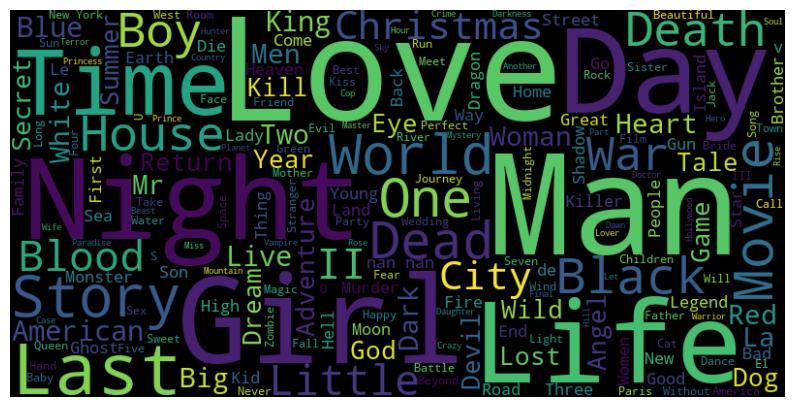

In [26]:
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


De este gráfico se puede observa las palabras mas utilizadas en los títulos de peliculas. 

Idioma de las Películas:

Text(0.5, 1.0, 'Number of films per language')

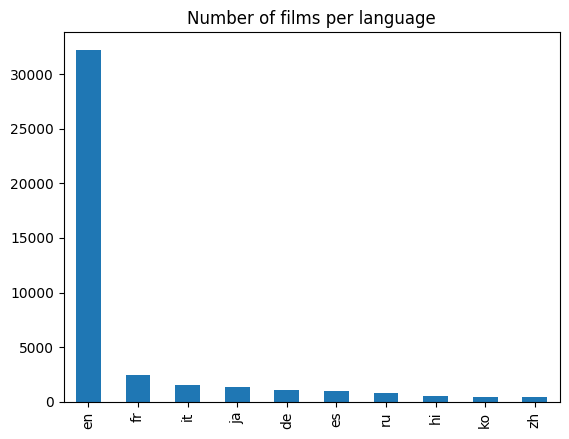

In [31]:
mov1.Original_Language.value_counts()[:10].plot.bar()
plt.title("Number of films per language")

Películas con mas Ganancias:

In [38]:
df = mov1.sort_values('Revenue', ascending=False).head(10)


In [45]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'yellow', 'grey','pink']

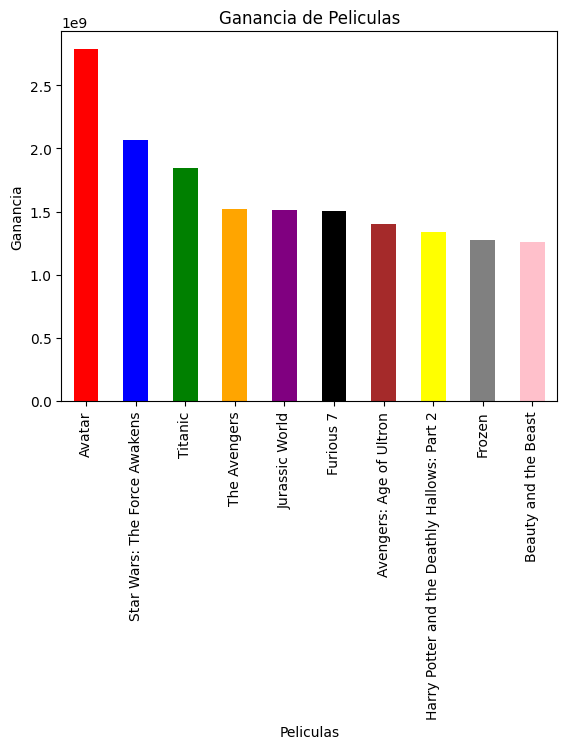

In [46]:
df.plot(x=' Title', y='Revenue', kind='bar', legend=False, color = colors)

plt.xlabel('Peliculas')
plt.ylabel('Ganancia')
plt.title('Ganancia de Peliculas')

plt.show()


Popularidad de las Películas

In [69]:
df1 = mov1.sort_values('Popularity', ascending=False).head(10)

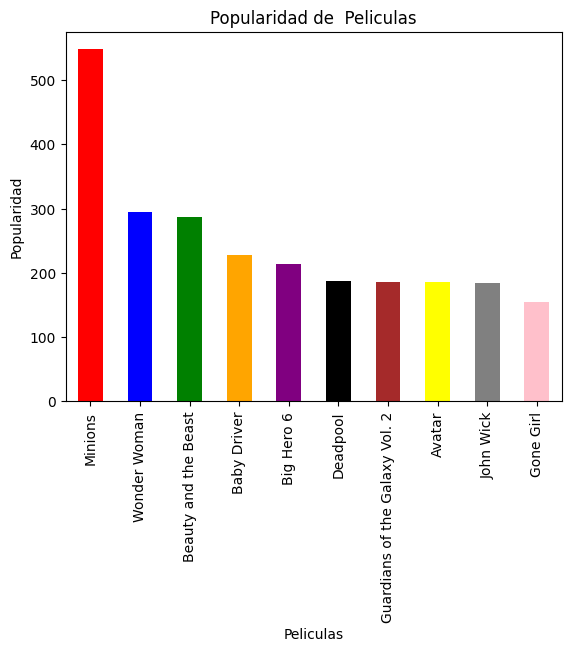

In [70]:
df1.plot(x=' Title', y='Popularity', kind='bar', legend=False, color = colors)

plt.xlabel('Peliculas')
plt.ylabel('Popularidad')
plt.title('Popularidad de  Peliculas')

plt.show()

Podemos pensar qu la popularidad y las ganancias de las películas esta relacionadas pro al realizar el gráfico de barras nos damos cuenta que no asi.Las películas con mas ganacias no son las mas populares.  

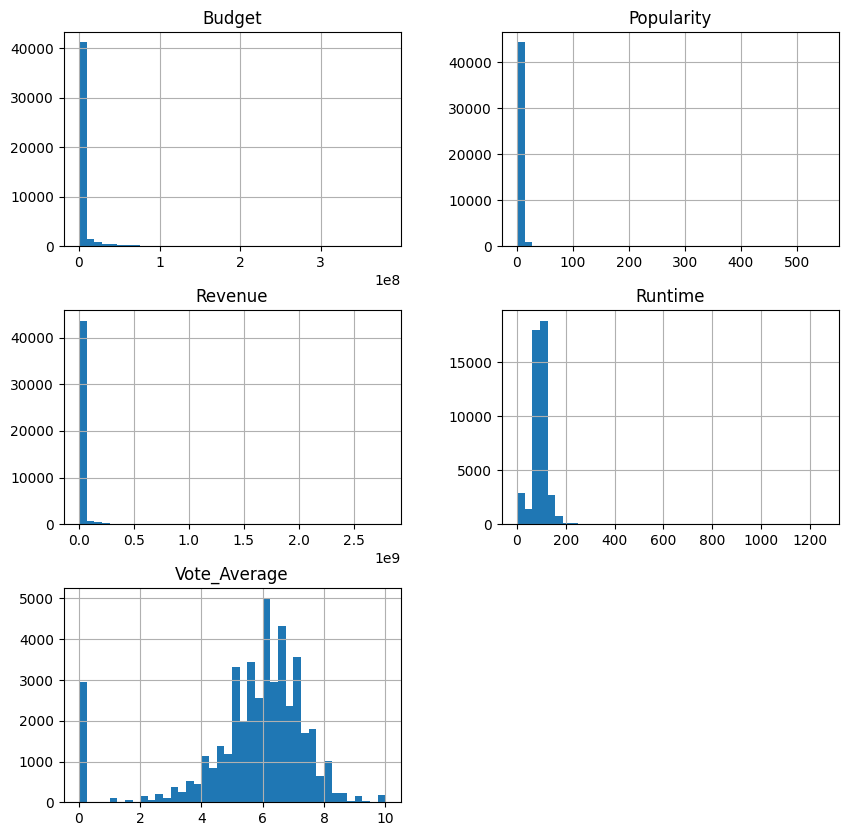

In [58]:
columnas = ['Budget', 'Popularity',	'Revenue', 'Runtime', 'Vote_Average']
mov1[columnas].hist(bins=40, figsize= (10, 10))
plt.show()

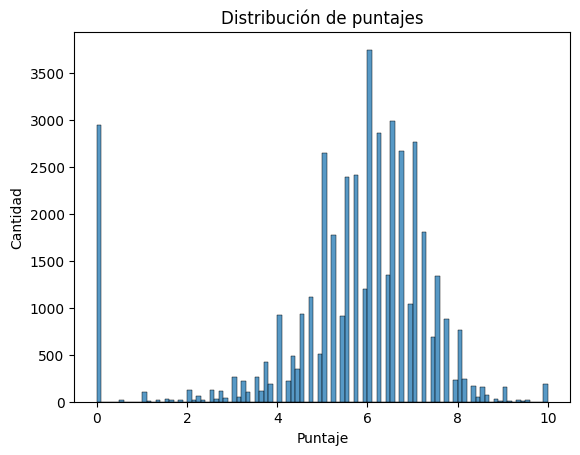

In [68]:
# Puntajes
sns.histplot(mov1['Vote_Average'])
plt.xlabel('Puntaje')
plt.ylabel('Cantidad')
plt.title('Distribución de puntajes')
plt.show()

 .Los puntajes 'Vote_Average' de las películas siguen aproximadamente una distribución normal.
 .El resto de las distribuciones presentan un gran sesgo a la derecha.


Outliers

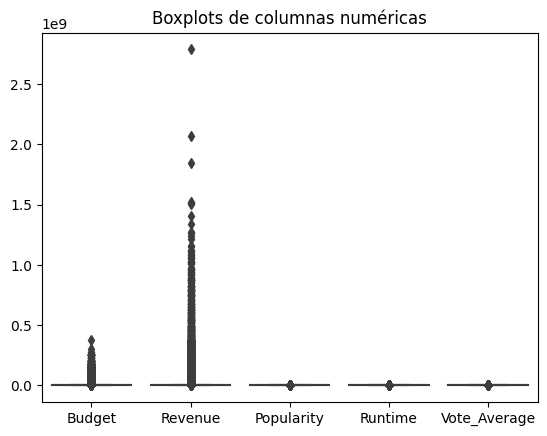

In [65]:


sns.boxplot(data=mov1[['Budget', 'Revenue', 'Popularity', 'Runtime', 'Vote_Average']])
plt.title('Boxplots de columnas numéricas')
plt.show()

Se observan muchos outliers en presupuesto (budget) y ganancia (revenue).

CORRELACIONES:

C:\Users\Mario\AppData\Local\Temp\ipykernel_2424\167929909.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mov1.corr()


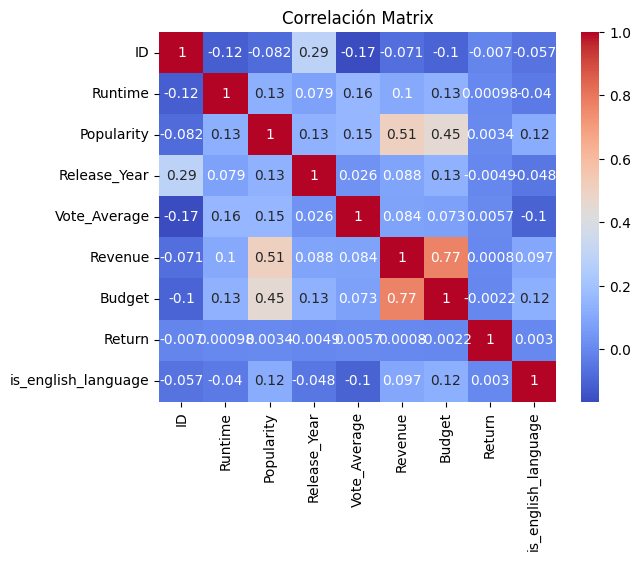

In [71]:
correlation_matrix = mov1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación Matrix')
plt.show()


Se visualiza una relación positiva entre la popularidad de la película y las ganancias como así también entre la popularidad y el presupuesto.
También se observa una relación positiva entre presupuesto y ganancias.
No existe una correlación alta entre popularidad y puntaje.

Podemos analizar si las películas con inversion mayor son las que resultan más populares:

C:\Users\Mario\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


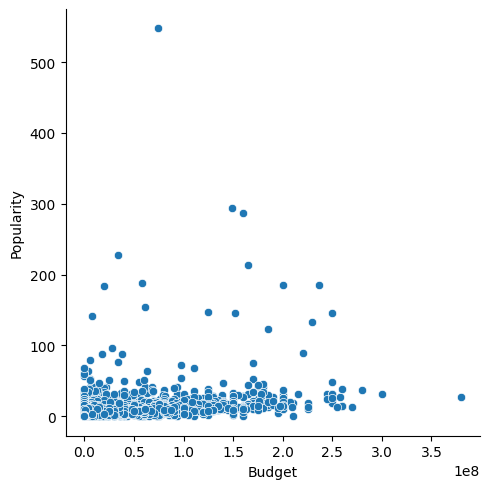

In [74]:
sns.relplot(x='Budget',y='Popularity', data=mov1)

No podemos afirmar que exista dicha relación

In [80]:
# Al observar que la cantidad de películas por año aumenta desde 1970, filtramos nuestro dataset para peliculas a partir de 1970
mov1 = mov1[(mov1['Release_Year'] >= 1970)]

In [81]:
# Primero trabajaremos sobre la columna 'overview' (descripción de la película)

# Convertimos todos los valores en la columna 'overview' a strings
mov1['Overview'] = mov1['Overview'].astype(str)

C:\Users\Mario\AppData\Local\Temp\ipykernel_2424\580404796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov1['Overview'] = mov1['Overview'].astype(str)


In [82]:
# Concatenamos todas las descripciones de las películas en una sola cadena de texto
# Utilizamos astype para asegurarnos de que todos los valores son cadenas de texto
text = ' '.join(mov1['Overview'].astype(str))

In [83]:
# Eliminamos los duplicados basándonos en la columna 'title'
mov1 = mov1.drop_duplicates(subset=' Title')

In [85]:
# Recreamos el índice de los títulos luego de eliminar los duplicados
indices = pd.Series(mov1.index, index=mov1[' Title']).drop_duplicates()


In [86]:
# Volveremos a filtrar nuestro dataset de modo de poder quedarnos con las películas con mayor popularidad y puntaje
# De esta manera, el usuario del modelo tendrá una alta probabilidad de obtener recomendación para la película elegida

# Convertimos las columnas a float
mov1['Popularity'] = pd.to_numeric(mov1['Popularity'], errors='coerce')
mov1['Vote_Average'] = pd.to_numeric(mov1['Vote_Average'], errors='coerce')

# Ordenamos por popularidad y tomamos las primeras 10000 filas
mov1_popular = mov1.sort_values(by='Popularity', ascending=False).head(10000).reset_index(drop=True)

# Ordenamos por vote_average y tomamos las primeras 10000 filas
mov1_highly_rated = mov1.sort_values(by='Vote_Average', ascending=False).head(10000).reset_index(drop=True)

In [ ]:
# Al tener una mejor distribución de los datos para los puntajes de las películas (vote_average) nos quedamos con el dataset filtrado por este criterio

In [87]:
# Exportamos el csv para poder ser consumido por la API

mov1_highly_rated.to_csv('Mov_mlops.csv', index=False)

In [ ]:
# Este código implementa un modelo de recomendación de películas basado en la similitud del coseno. La idea principal detrás de este modelo es 
# encontrar películas similares basándose en la similitud de sus características, 
# como el resumen, el género y las empresas productoras.

In [97]:
# Armamos el modelo de recomendación

# Importamos las librerías para calcular la similitud del coseno y para vectorizar el texto de las características.
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import HashingVectorizer

In [98]:
# Aseguramos que los datos de la columna 'overview' sean strings
mov1_highly_rated['Overview'] = mov1_highly_rated['Overview'].fillna('').astype('str')

In [99]:
# Aseguramos que los datos de la columna 'genres' sean strings
mov1_highly_rated['Genre'] = mov1_highly_rated['Genre'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

In [100]:
# Reemplazamos los valores NaN con cadenas vacías en la columna 'production_companies'
mov1_highly_rated['Company'] = mov1_highly_rated['Company'].fillna('')

In [101]:
# Convertimos la columna 'production_companies' a string si es necesario
mov1_highly_rated['Company'] = mov1_highly_rated['Company'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

In [102]:
# Creamos una nueva columna combinando las características de interés
mov1_highly_rated['combined_features'] = mov1_highly_rated['Overview'] + ' ' + mov1_highly_rated['Genre'] + ' ' + mov1_highly_rated['Company']


In [103]:
# Convertimos todos los textos a minusculas para evitar duplicados
mov1_highly_rated['combined_features'] = mov1_highly_rated['combined_features'].str.lower()

In [104]:
# Inicializamos el HashingVectorizer para vectorizar el texto en una matriz de características. La dimensión de la matriz se establece en 2000.
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=2000)

In [105]:
# Transformamos los datos
hash_matrix = hash_vectorizer.fit_transform(mov1_highly_rated['combined_features'])

In [106]:
# Calculamos la similitud del coseno de la matriz de características usando la función cosine_similarity()
cosine_sim = cosine_similarity(hash_matrix)

In [107]:
# Creamos un índice de películas utilizando los títulos de las películas como clave y los índices como valores.
indices = pd.Series(mov1_highly_rated.index, index=mov1_highly_rated[' Title']).drop_duplicates()

In [108]:
def recomendacion(titulo):
    '''Ingresas un nombre de pelicula y te recomienda 5 similares
    '''
    if titulo not in mov1_highly_rated[' Title'].values:
        return 'La película no se encuentra en el conjunto de datos de muestra.'
    else:
        # Obtenemos el índice de la película que coincide con el título
        idx = indices[titulo]

        # Obtenemos las puntuaciones de similitud de todas las películas con la puntuación de la película dada
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordenamos las películas en función de las puntuaciones de similitud
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtenemos las puntuaciones de las 5 películas más similares
        sim_scores = sim_scores[1:6]

        # Obtenemos los índices de las películas
        movie_indices = [i[0] for i in sim_scores]

        # Devolvemos las 5 películas más similares
        return {'lista recomendada': mov1_highly_rated[' Title'].iloc[movie_indices].tolist()}

In [115]:
print(recomendacion("The Mighty"))

{'lista recomendada': ['Brother of Sleep', 'The Pearl Color', 'The Neon Bible', 'Kevin', 'Home Alone']}


In [113]:
print(recomendacion("Jumanji"))

{'lista recomendada': ['Fastball', 'Monday', 'Wreck-It Ralph', 'Being There', 'Indie Game: The Movie']}
